<a href="https://colab.research.google.com/github/maxmelichov/Anamaly-Detation-With-LSTM/blob/main/Anamaly_detation_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd
import numpy as np
# import config
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import scipy.stats as st
from pandas_profiling import ProfileReport
import sweetviz as sv

register_matplotlib_converters()
sns.set(style="whitegrid", palette= "muted", font_scale =1.5)
rcParams['figure.figsize']=22,10


In [ ]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = ""

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!gdown --id 10vdMg_RazoIatwrT7azKFX4P02OebU76 --output spx.csv


/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=10vdMg_RazoIatwrT7azKFX4P02OebU76
To: /content/spx.csv
100% 152k/152k [00:00<00:00, 62.0MB/s]


In [ ]:
!kaggle datasets download -d rawaneid/microsoft-stock-market-2001-2021

  0% 0.00/74.8k [00:00<?, ?B/s]
100% 74.8k/74.8k [00:00<00:00, 33.8MB/s]


In [ ]:
df1 = pd.read_csv("microsoft-stock-market-2001-2021.zip",parse_dates=['Unnamed: 0'], index_col='Unnamed: 0')
df2 = pd.read_csv('GE.csv',parse_dates=['Date'], index_col='Date')
df3 = pd.read_csv('spx.csv',parse_dates=['date'], index_col='date')

In [ ]:
my_report = sv.analyze(df1)
my_report.show_html(filepath="df1.html")

                                             |          | [  0%]   00:00 -> (? left)

Report df1.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
my_report = sv.analyze(df2)
my_report.show_html(filepath="df2.html")

                                             |          | [  0%]   00:00 -> (? left)

Report df2.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
my_report = sv.analyze(df3)
my_report.show_html(filepath="df3.html")

                                             |          | [  0%]   00:00 -> (? left)

Report df3.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
df1.head()

,open,high,low,close,volume
2001-03-16,26.25000,27.56250,26.24219,27.28125,112848800
2001-03-19,27.25000,27.75000,26.56250,27.15625,61036400
2001-03-20,27.28125,28.06250,26.31250,26.34375,91822800
2001-03-21,26.12500,26.62500,24.87500,25.03125,124988600
2001-03-22,25.28125,27.03125,25.25000,27.00000,126363200


In [ ]:
df2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,6.009615,6.109776,5.949519,5.989583,1.009673,269568
1962-01-03,5.959535,5.959535,5.909455,5.929487,0.999543,184704
1962-01-04,5.929487,5.979567,5.809295,5.859375,0.987725,229632
1962-01-05,5.859375,5.869391,5.608974,5.709135,0.962398,340704
1962-01-08,5.709135,5.709135,5.528846,5.699119,0.960710,386880


In [ ]:
df3.head()

,close
date,
1986-01-02,209.59
1986-01-03,210.88
1986-01-06,210.65
1986-01-07,213.80
1986-01-08,207.97


In [ ]:
df1.rename(columns  ={"Unnamed: 0":"date"},inplace = True)

In [ ]:
df1.head()

,open,high,low,close,volume
2001-03-16,26.25000,27.56250,26.24219,27.28125,112848800
2001-03-19,27.25000,27.75000,26.56250,27.15625,61036400
2001-03-20,27.28125,28.06250,26.31250,26.34375,91822800
2001-03-21,26.12500,26.62500,24.87500,25.03125,124988600
2001-03-22,25.28125,27.03125,25.25000,27.00000,126363200


In [ ]:
df2.rename(columns  ={"Close":"close","Date":"date"},inplace = True)

In [ ]:
df2.head()

,Open,High,Low,close,Adj Close,Volume
Date,,,,,,
1962-01-02,6.009615,6.109776,5.949519,5.989583,1.009673,269568
1962-01-03,5.959535,5.959535,5.909455,5.929487,0.999543,184704
1962-01-04,5.929487,5.979567,5.809295,5.859375,0.987725,229632
1962-01-05,5.859375,5.869391,5.608974,5.709135,0.962398,340704
1962-01-08,5.709135,5.709135,5.528846,5.699119,0.960710,386880


In [ ]:
# datafra = df1[["date",'close']]

In [ ]:
def visualization1(df):
    plt.plot(df['close'],label="close price")

In [ ]:
def data_engineering(df):
    train_size =int(len(df)*0.95)
    train, test = df.iloc[0:train_size],df.iloc[train_size:len(df)]
    print(train.shape, test.shape)

    scaler = StandardScaler()
    scaler = scaler.fit(train[['close']])
    train['close']= scaler.transform(train[["close"]])
    test['close']= scaler.transform(test[["close"]])
    train.head()
    return train,test,scaler

In [ ]:
def create_dataset(X,y,time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
def train_test_split(train,test,TIME_STEPS):

    x_train,y_train = create_dataset(train[["close"]],train.close,TIME_STEPS)
    x_test,y_test = create_dataset(test[["close"]],test.close,TIME_STEPS)
    return x_train,x_test,y_train,y_test

In [ ]:
def get_model():
    """
    Returns a compiled LSTM model for anomaly detection.

    Returns:
        model (keras.Sequential): The compiled LSTM model.
    """
    model= keras.Sequential()

    model.add(keras.layers.LSTM(units=128,input_shape=(x_train.shape[1],x_train.shape[2])))
    model.add(keras.layers.Dropout(rate=0.2))

    model.add(keras.layers.RepeatVector(n=x_train.shape[1]))
    model.add(keras.layers.LSTM(units=128,return_sequences=True))

    model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.TimeDistributed(keras.layers.Dense(units=x_train.shape[2])))

    model.compile(loss='mae',optimizer ='adam')
    return model

In [ ]:
def visualization2(train_mse_loss,axs):

    sns.distplot(train_mse_loss,bins=50,kde=True,ax = axs)

In [ ]:

def visualization3(test_score_df,axs):
    sns.lineplot(x= test_score_df.index, y= test_score_df.loss,label='loss',ax = axs)
    sns.lineplot(x = test_score_df.index, y =test_score_df.threshold,label='threshold',ax = axs)
   

In [ ]:
def visualization4(test,anomalies,TIME_STEPS,scaler,axs):
    sns.lineplot(
      x= test[TIME_STEPS:].index, 
      y= scaler.inverse_transform(test[TIME_STEPS:].close.values.reshape(1,-1)).reshape(-1), 
      label='close price',ax = axs
    )

    sns.scatterplot(
      x= anomalies.index,
      y= scaler.inverse_transform(anomalies.close.values.reshape(1,-1)).reshape(-1),
      color=sns.color_palette()[3],
      s=52,
      label='anomaly',ax = axs
    )
  

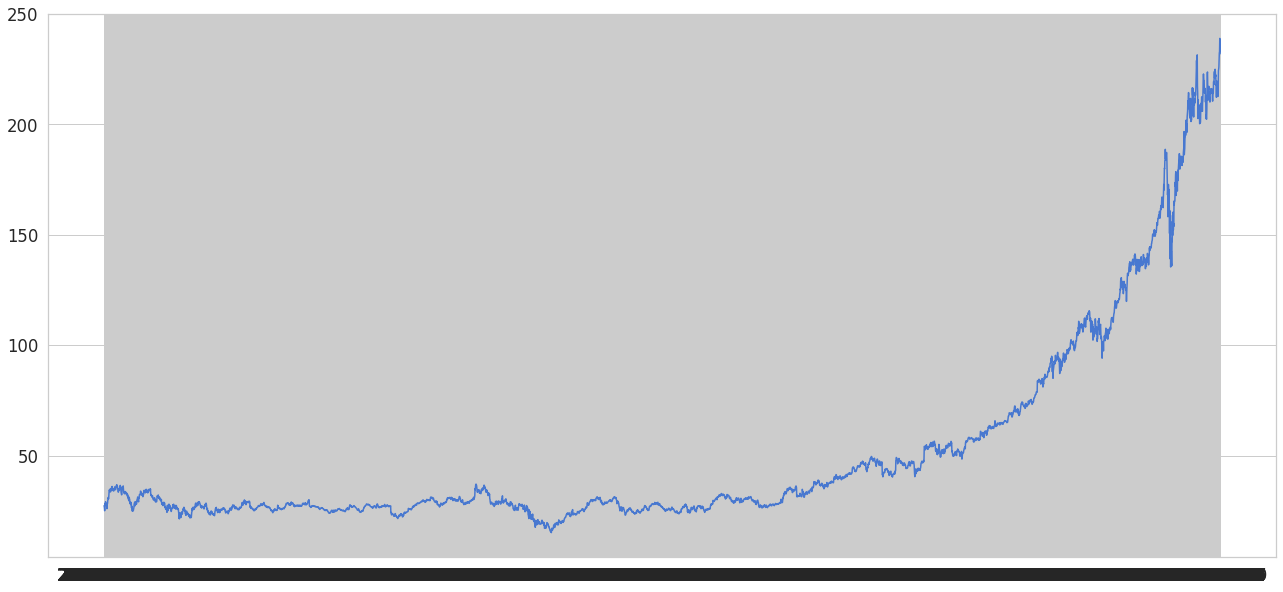

In [ ]:
visualization1(df1)

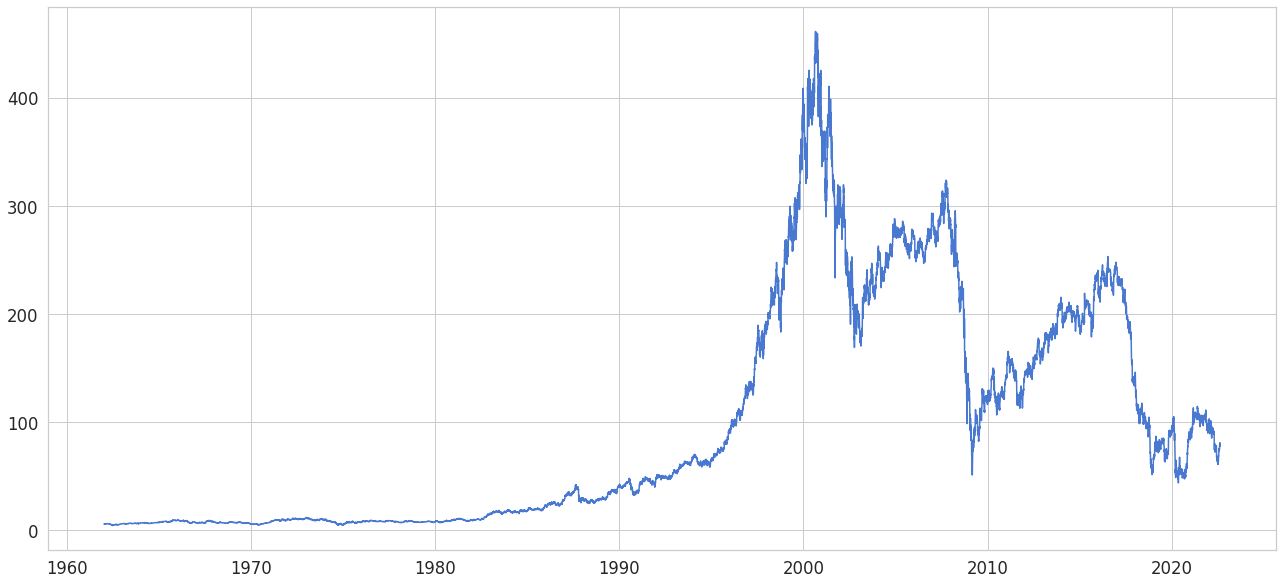

In [ ]:
visualization1(df2)

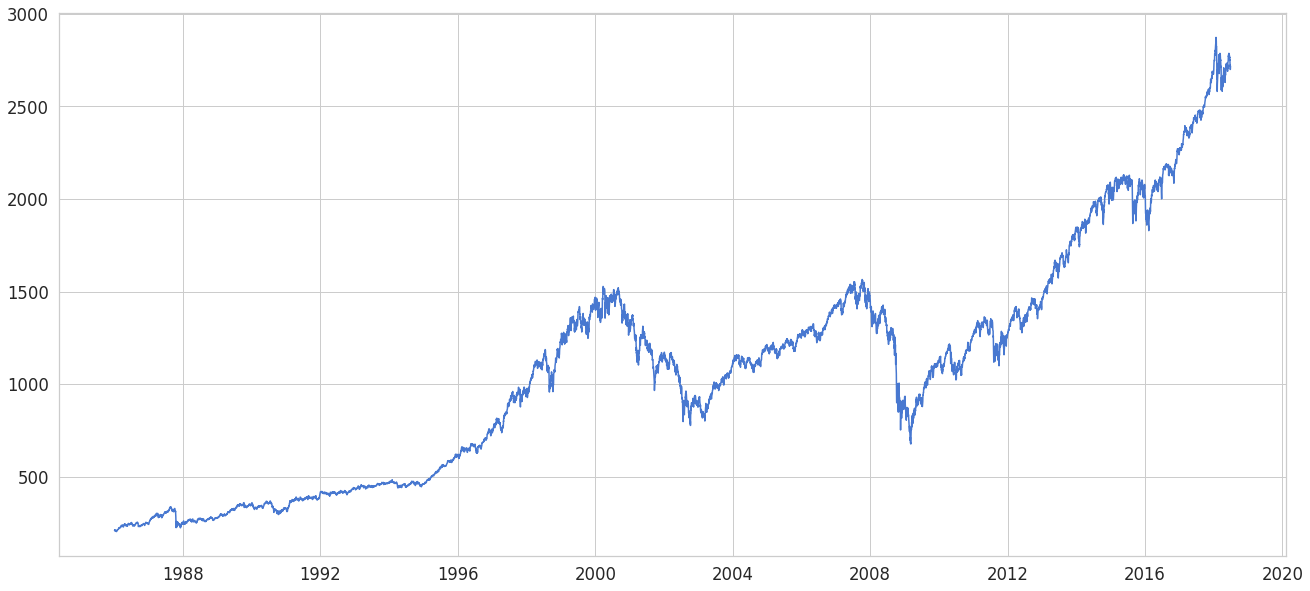

In [ ]:
visualization1(df3)

Start
1
(4750, 1) (250, 1)
2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


3
4
Epoch 1/50
67/67 [==============================] - 13s 144ms/step - loss: 0.1162 - val_loss: 0.3854
Epoch 2/50
67/67 [==============================] - 9s 130ms/step - loss: 0.1024 - val_loss: 0.2877
Epoch 3/50
67/67 [==============================] - 9s 131ms/step - loss: 0.0848 - val_loss: 0.2440
Epoch 4/50
67/67 [==============================] - 9s 131ms/step - loss: 0.0805 - val_loss: 0.2664
Epoch 5/50
67/67 [==============================] - 9s 130ms/step - loss: 0.0734 - val_loss: 0.2499
Epoch 6/50
67/67 [==============================] - 9s 130ms/step - loss: 0.0747 - val_loss: 0.2344
Epoch 7/50
67/67 [==============================] - 9s 129ms/step - loss: 0.0714 - val_loss: 0.1964
Epoch 8/50
67/67 [==============================] - 9s 130ms/step - loss: 0.0721 - val_loss: 0.2993
Epoch 9/50
67/67 [==============================] - 9s 130ms/step - loss: 0.0667 - val_loss: 0.2471
Epoch 10/50
67/67 [==============================] - 9s 131ms/step - loss: 0.0693 - val_loss: 0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


5
Finish
Start
1
(14500, 1) (764, 1)
2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


3
4
Epoch 1/50
204/204 [==============================] - 32s 134ms/step - loss: 0.1330 - val_loss: 0.1884
Epoch 2/50
204/204 [==============================] - 27s 131ms/step - loss: 0.1056 - val_loss: 0.1355
Epoch 3/50
204/204 [==============================] - 27s 130ms/step - loss: 0.0886 - val_loss: 0.1321
Epoch 4/50
204/204 [==============================] - 27s 131ms/step - loss: 0.0999 - val_loss: 0.1022
Epoch 5/50
204/204 [==============================] - 27s 131ms/step - loss: 0.1268 - val_loss: 0.1743
Epoch 6/50
204/204 [==============================] - 27s 130ms/step - loss: 0.1352 - val_loss: 0.1260
Epoch 7/50
204/204 [==============================] - 27s 131ms/step - loss: 0.1359 - val_loss: 0.0986
Epoch 8/50
204/204 [==============================] - 27s 131ms/step - loss: 0.1116 - val_loss: 0.1017
Epoch 9/50
204/204 [==============================] - 27s 131ms/step - loss: 0.1150 - val_loss: 0.0888
Epoch 10/50
204/204 [==============================] - 34s 168ms/step

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


5
Finish
Start
1
(7782, 1) (410, 1)
2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


3
4
Epoch 1/50
109/109 [==============================] - 17s 131ms/step - loss: 0.1842 - val_loss: 0.2234
Epoch 2/50
109/109 [==============================] - 13s 122ms/step - loss: 0.1100 - val_loss: 0.2267
Epoch 3/50
109/109 [==============================] - 13s 122ms/step - loss: 0.1019 - val_loss: 0.1761
Epoch 4/50
109/109 [==============================] - 13s 122ms/step - loss: 0.0974 - val_loss: 0.1749
Epoch 5/50
109/109 [==============================] - 13s 123ms/step - loss: 0.0961 - val_loss: 0.1596
Epoch 6/50
109/109 [==============================] - 13s 122ms/step - loss: 0.0934 - val_loss: 0.1557
Epoch 7/50
109/109 [==============================] - 13s 123ms/step - loss: 0.0939 - val_loss: 0.1463
Epoch 8/50
109/109 [==============================] - 13s 123ms/step - loss: 0.0942 - val_loss: 0.1090
Epoch 9/50
109/109 [==============================] - 13s 123ms/step - loss: 0.0940 - val_loss: 0.1058
Epoch 10/50
109/109 [==============================] - 13s 124ms/step

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


5
Finish


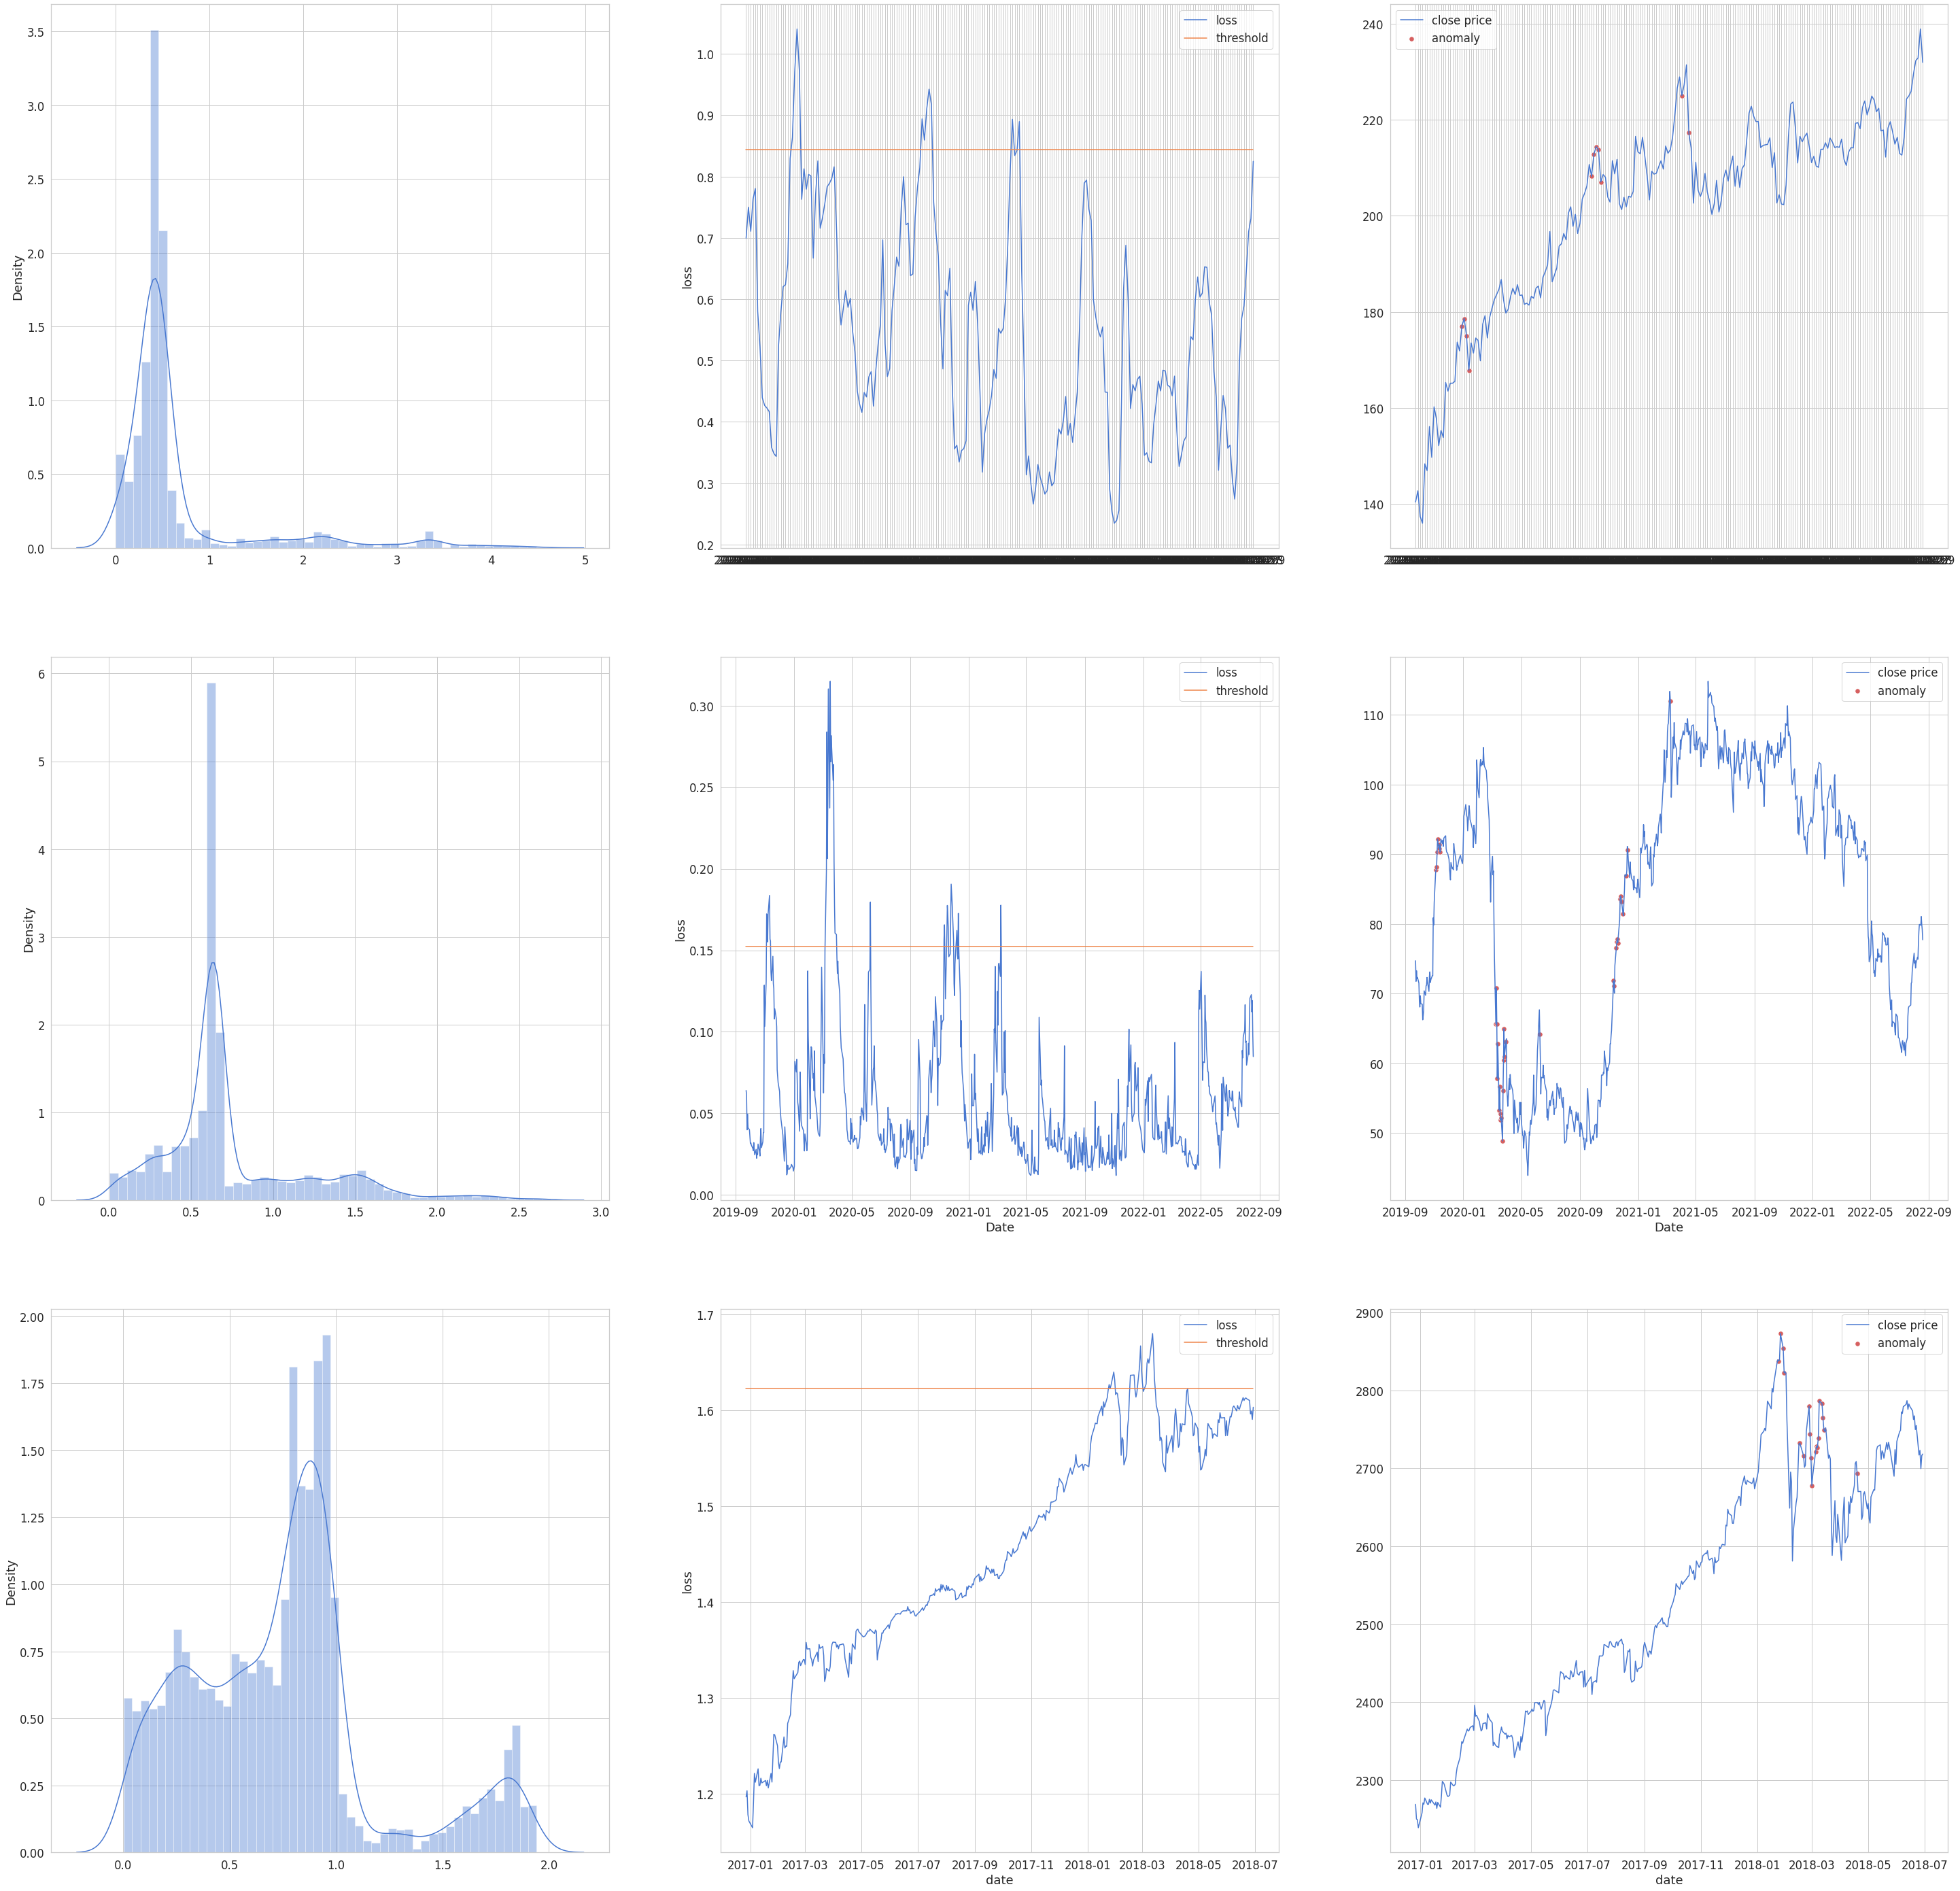

In [ ]:

list_df = [ df1 , df2 , df3]
TIME_STEPS = 30
ig,axs=plt.subplots(3,3,figsize=(50,50))

axs = axs.ravel()

i=0

for df in list_df: 
    print('Start')

    df = df[['close']]
    # visualization1(df)
    
    print(1)

    train,test,scaler = data_engineering(df)
    print(2)

    x_train,x_test,y_train,y_test = train_test_split(train,test,TIME_STEPS)
    print(3)

    model = get_model()
    print(4)

    history = model.fit(x_train,y_train, epochs =50 , batch_size=64,validation_split=0.1,shuffle = False)
    x_train_pred = model.predict(x_train)

    train_mse_loss=np.mean(np.abs(x_train_pred,x_train),axis=1)
    x_test_pred = model.predict(x_test)
    visualization2(train_mse_loss,axs[i])
    i+=1
    test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
    # print(test_mae_loss)
    THRESHOLD = np.percentile(test_mae_loss, 95)

    test_score_df = pd.DataFrame(index=test[TIME_STEPS:].index)
    test_score_df['loss'] = test_mae_loss
    test_score_df['threshold'] = THRESHOLD
    test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold
    test_score_df['close'] = test[TIME_STEPS:].close

    anomalies = test_score_df[test_score_df.anomaly == True]
    anomalies.head()

   
    visualization3(test_score_df,axs[i])
    i+=1
    print(5)
    visualization4(test,anomalies,TIME_STEPS,scaler,axs[i])
    i+=1
    print('Finish')
    